# 5. Equações Diferenciais ordinárias (EDO)

Em matemática, uma equação diferencial é uma equação cuja incógnita é uma função que aparece na equação sob a forma das respectivas derivadas. 
As equações diferenciais são utilizadas para modelar problemas de ciências
e engenharia que envolvem a mudança de uma variável em relação a outra.
Muitas equações diferenciais oriundas de problemas da vida real são muito
complicadas e não possuem solução analítica. Com certa frequência
recorre-se a métodos numéricos para obter uma solução aproximada,
transformando o modelo contínuo em um modelo discreto. O processo pelo
qual se obtém as equações algébricas é denominado de discretização. É a
discretização que torna o problema “finito” e viabiliza a sua “solução” através
de computadores.

As equações diferenciais dividem-se em dois tipos:

* Equação diferencial ordinária (EDO): contém apenas funções de uma variável e derivadas daquela mesma variável;
* Equação diferencial parcial (EDP): contém funções com mais do que uma variável e suas derivadas parciais.
               

Aqui vamos tratar apenas das EDOs que podem ser divididas em 2 categorias: 

- Problema do Valor Inicial (PVI): usado geralmente quando temos uma equação de movimento e queremos propaga-la no tempo. 

- Problema de Contorno: usado geralmente quando conhecemos a função em outro ponto além do inicial.


##### Topicos:

    5.1 PVI
      5.1.1. Metodo de Euler
      5.1.2. Metodo de Runge–Kutta (RK4)
      5.1.3. Exemplo e Metodo do Scipy
    5.2 Problema de Contorno  

##  5.1 PVI

O problema de Valor Inicial (PVI) se trata de EDOs envolvendo problemas de valor inicial. É chamado de problema de valor inicial quando queremos resolver uma EDO de 1ª ordem, do tipo:

$$\frac{dy}{dt}=f(t,y) , \hspace{0.6cm} y(t_0)=y_0$$


Existe procedimentos numéricos para solucionar equações diferenciais ordinárias com um valor inicial dado, para EDOs de primeira ordem temos o Método de Euler e o de Runge–Kutta.



### 5.1.1 Método de Euler
    
O método de Euler é um método de Taylor de ordem 1. 

Consiste do seguinte: queremos saber o comportamento de uma função $y$, dado que sabemos seu comportamento no ponto inicial $y(t=0)$ e além disso sabemos que a derivada de $y$ é uma função de $y(t)$ e $t$ por exemplo, ou seja
   

$\dfrac{d y}{d t} = f(y, t) \hspace{1cm}$ e $ \hspace{1cm} y(t_0) = y_0$


Usando a aproximação $\dfrac{d y}{d t} \approx \dfrac{y(t + \delta t) - y(t)}{\delta t} $

Então juntando as duas equações, temos o método de Euler


$$y(t + \delta t) = y(t) + \delta t f(y, t)$$

ou escrevendo de outra forma, temos
 

$$y_{n+1} = y_n + h f(t_n, y_n)$$

onde $h$ é o tamanho de cada etapa e $t_{n}=t_{0}+nh$.




### 5.1.2 Metodo de Runge–Kutta  de 4ª ordem (RK4)

Os métodos de Runge-Kutta têm a vantagem de não necessitarem de derivadas de ordem superior da função
$f(t, y)$, como nos métodos de Taylor, porém, obtém-se as mesmas ordens dos erros de
truncamento. Os métodos de Runge-Kutta são baseados na avaliação da função $f(t, y)$ em alguns pontos. Considere o PVI:

$\dfrac{d y}{d t} = f(y, t) \hspace{1cm}$ e $ \hspace{1cm} y(t_0) = y_0$


Então o método RK4 para este problema é dado pelas seguintes equações


$y_{n+1} = y_n + \dfrac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

$t_{n+1} = t_n + h$

onde $n = 0, 1, 2, 3,...$, $y_{n+1}$ é a aproximação por RK4 de $y(t_{n+1})$ e

$k_1 = f(t_n, y_n)$

$k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1)$

$k_3 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2)$

$k_4 = f(t_n + h, y_n + h k_3)$




### 5.1.3 Exemplos

#### Exemplo 1: Paraquedista em queda com resistência do ar

A equação diferencial é

$\dfrac{dv}{dt} = g - b*v$,

sendo $g = 9.8 m/s²$ e $b = 1 s⁻¹$. Use como condição inicial $v(0) = 0$, e resolva o problema no intervalo de $t=0$ até $t=5 s$. Varie o passo de discretização dt para ver como a solução muda.

In [47]:
# primeiro, definido as funções ...

# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# met. de euler    y(t + dt) = y(t) + dt * f(y(t), t)    em que  f(y(t), t) = y' 
def euler(f, y0, t):
    dt = t[1] - t[0]
    yt = [y0]
    for i in t[1:]:
        yt.append(yt[-1] + dt*f(t, yt[-1]))
    #ou
    #for i in range(len(t)-1):
    #    yt.append(yt[i] + dt*f(yt[i], t))    
    return np.array(yt)


# met. de Runge–Kutta    y(t + dt) = y(t) + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)  em que  k1 = f(y(t), t) = y' ...
def RK4(f, y0, t):
    dt = t[1]-t[0]
    yt = [y0]    
    for i in t[1:]:
        k1 = f(t, yt[-1])
        k2 = f(t+(dt/2), yt[-1]+(dt/2)*k1)
        k3 = f(t+(dt/2),yt[-1]+(dt/2)*k2)
        k4 = f(t+dt,yt[-1]+dt*k3)
        yt.append(yt[-1]+(dt/6)*(k1+2*k2+2*k3+k4))
    return np.array(yt)


# # outra forma de fazer ...
# def runge(f, y0, t):
#     dt = t[1]-t[0]
#     y = np.zeros(len(t))
#     y[0] = y0
#     for j in range(len(t)-1):
#         k1 = f(t[j], y[j])
#         k2 = f(t[j]+0.5*dt, y[j]+0.5*k1*dt)
#         k3 = f(t[j]+0.5*dt, y[j]+0.5*k2*dt)
#         k4 = f(t[j]+dt, y[j]+k3*dt)
#         y[j+1] = y[j] + dt*(k1+2*k2+2*k3+k4)/6
#     return y


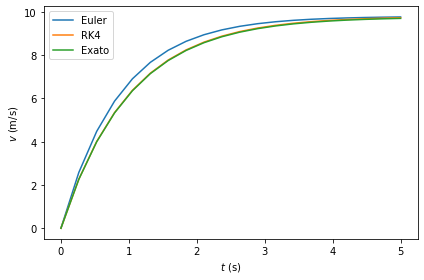

In [48]:
# eq.diferencial
g = 9.8
b = 1
f = lambda t, v: g - b*v  

y0 = 0 # cond inicial      

n = 20 # numero de pontos
t = np.linspace(0, 5, n)

# metodos
y_euler = euler(f, y0, t)  

y_rk4 = RK4(f, y0, t) 

#valor exato
y_exato = y_euler[n-1] + (y0 - y_euler[n-1])*np.exp(-b*t)   


#grafico
plt.plot(t, y_euler, label='Euler')
plt.plot(t, y_rk4, label='RK4')
plt.plot(t, y_exato, label='Exato')
plt.legend()
plt.xlabel(R'$t$ (s)')
plt.ylabel(R'$v$ (m/s)')
plt.tight_layout()
plt.show()

Metodo do scipy

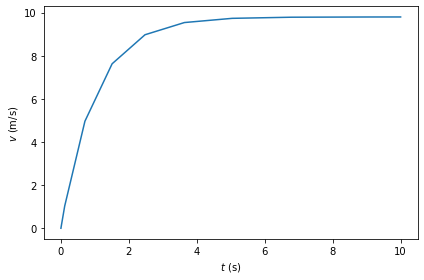

In [49]:
def a(t, v):
    g = 9.8
    b = 1
    return g - b*v  

tspan = (0, 10)
v0 = 0
sol = solve_ivp(a, tspan, [v0])


t = sol.t
y = sol.y[0]

plt.plot(t, y)
plt.xlabel(R'$t$ (s)')
plt.ylabel(R'$v$ (m/s)')
plt.tight_layout()
plt.show()  

#### Exemplo 2:  Lotka-Volterra

As equações de Lotka-Volterra são um par de equações diferenciais, frequentemente utilizadas para descrever dinâmicas nos sistemas biológicos, especialmente quando duas espécies interagem: uma como presa e outra como predadora. https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations

Considere que em um certo ambiente existem predadores (raposas) e presas (coelhos), sendo x o número de coelhos e y o número de raposas. 

$\dfrac{dx}{dt} = \alpha x - \beta  xy$

$\dfrac{dy}{dt} = \delta xy - \gamma y$


Para resolva as EDOs vamos usar o método de Euler, que é dado por  $y(t + \delta t) = y(t) + \delta t f(y, t)$

Por simplicidade $\alpha = \beta = \delta = 1$ e sendo as condições iniciais x(0) = 2, y(0) = 1.

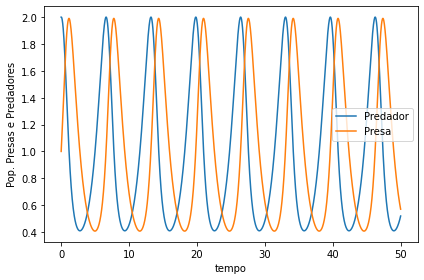

In [50]:
# usando o met. de euler    
def euler(f1, f2, y0, x0, t):
    dt = t[1] - t[0]
    xt = [x0]
    yt = [y0]    
    for i in t[1:]:
        xt.append(xt[-1] + dt*f1(xt[-1], yt[-1], t))
        yt.append(yt[-1] + dt*f2(xt[-1], yt[-1], t))   
    return np.array(xt), np.array(yt)

# cond. inicial
alpha = beta = delta = gamma = 1
y0 = 1       
x0 = 2       

# eqs. diferenciais
f1 = lambda x, y, t: x * (alpha - beta*y)  
f2 = lambda x, y, t: y * (delta*x - gamma)   

n = 2000       
t = np.linspace(0, 50, n)

y = euler(f1, f2, y0, x0, t)  


# grafico
plt.plot(t, y[0], label='Predador')
plt.plot(t, y[1], label='Presa')
plt.legend()
plt.xlabel(R'tempo')
plt.ylabel(R'Pop. Presas e Predadores')
plt.tight_layout()
plt.show()

Usando Scipy

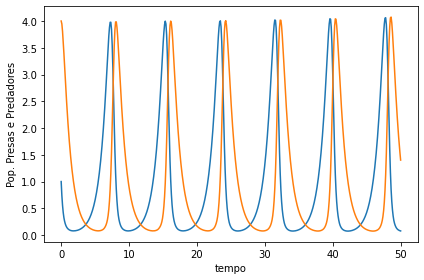

In [51]:
def lotka(f, v):
    α = β = δ = γ = 1
    x = v[0]
    y = v[1]
    return np.array([x*(α - β*y), y*(δ*x -γ)])  

x0 = 1
y0 = 4
v0 = np.array([x0, y0])
tspan = (0, 50)

teval = np.linspace(0, 50, 500)
sol = solve_ivp(lotka, tspan, v0, t_eval = teval)

t = sol.t
x = sol.y[0]
y = sol.y[1]

plt.plot(t, x)
plt.plot(t, y)
plt.xlabel(R'tempo')
plt.ylabel(R'Pop. Presas e Predadores')
plt.tight_layout()
plt.show()

Espaço de fase 

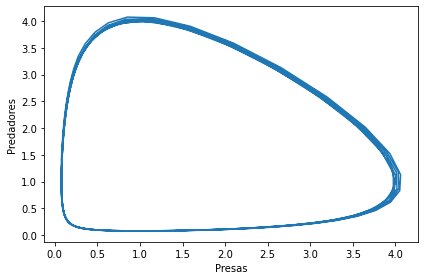

In [52]:
plt.plot(x, y)
plt.xlabel(R'Presas')
plt.ylabel(R'Predadores')
plt.tight_layout()
plt.show()

#### Exemplo 3 - Pêndulo amortecido

Considere a EDO do pêndulo amortecido,

$ \dfrac{d^2x}{dt^2} = -(w^2)x - bv $

sendo w = 2*pi rad/s a frequência natural de oscilações, e b o coeficiente de amortecimento linear.

Vamos resolver a EDO numericamente pelo método de Euler usando redução de ordem.

a) Resolva esta EDO numericamente pelo método de Euler usando a redução de ordem.

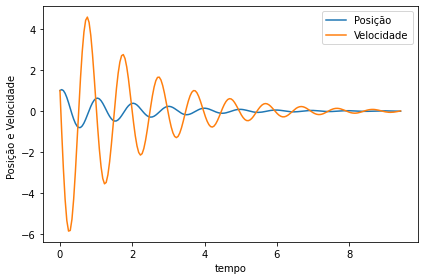

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# met. de euler    y(t + dt) = y(t) + dt * f(y(t), t)    em que  f(y(t), t) = y' 
def euler(f, v0, t):
    dt = t[1] - t[0]
    xt = [v0[0]]
    yt = [v0[1]]
    for i in t[1:]:
        xt.append(xt[-1] + dt*f(t, np.array([xt[-1], yt[-1]]))[0])
        yt.append(yt[-1] + dt*f(t, np.array([xt[-1], yt[-1]]))[1])   
    return np.array(xt), np.array(yt)

def f(t, v):
    b = 1
    w = 2 * np.pi
    x = v[0]
    y = v[1]
    return np.array([y, -(w**2)*x - b*y])

n = 200       # n de pontos
y0 = 1       # cond inicial
x0 = 1       # cond inicial
v0 = np.array([x0, y0])

t = np.linspace(0, 3 * np.pi , n)

y = euler(f, v0, t)  #valor numerico

#grafico
plt.plot(t, y[0], label='Posição')
plt.plot(t, y[1], label='Velocidade')
plt.legend()
plt.xlabel(R'tempo')
plt.ylabel(R'Posição e Velocidade ')
plt.tight_layout()
plt.show()

b) Resolva esta EDO usando os métodos apropriados do SciPy.

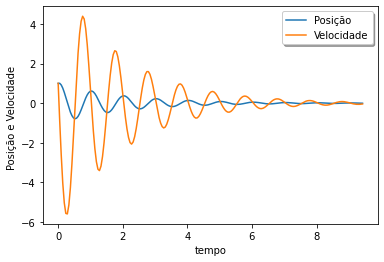

In [54]:
from scipy.integrate import solve_ivp

def f(t, z, w, b):
    x, y = z
    return [y, -(w**2)*x - b*y]


sol = solve_ivp(f, [0, 15], [1, 1], args=(2*np.pi, 1),
                dense_output=True, rtol=0.0001, atol=0.00001)

t = np.linspace(0, 3*np.pi, 200)
z = sol.sol(t)
plt.plot(t, z.T)
plt.legend(['Posição', 'Velocidade'], shadow=True)
plt.xlabel(R'tempo')
plt.ylabel(R'Posição e Velocidade ')
plt.show()

## 5.2 Problema de Contorno 

Problemas de valor de contorno surgem em diversos ramos da física. Como por exemplo na determinação dos modos normais de uma onda.

Equação de onda:

$$ \frac{\partial^2}{\partial x^2} y(x, t) = \frac{1}{c^2} \frac{\partial^2}{\partial t^2}  y(x, t)  $$


Solução do tipo: $ y(x, t) = A_n e^{i\omega_n t} f_n(x)$

Substituindo essa solução na equação de onda, encontramos a seguinte EDO

$$ \frac{\partial^2}{\partial x^2} f_n(x) = \frac{-\omega_n^2}{c^2} f_n(x)  $$

De forma geral, a solução para a EDO pode ser

$$ f_n(x) = A \cos(\alpha x + \phi)$$

onde $\alpha = \frac{\omega_n}{c}$.


Aqui vamos ter diferentes condições de contorno (corda com as pontas presas, soltas, uma presa e outra solta ...). 


No caso da corda com as pontas presas, temos:  

$f(0)=0$ e $f(L)=0$


Dessa forma, usando essas condições de contorno, encontramos que 


$$ f_n(x) = - A \sin(\frac{\omega_n}{c}x) $$


###### Numericamente:



$$ \frac{\partial^2}{\partial x^2} f = \frac{-\omega^2}{c^2} f  $$

Por diferenças finitas, temos que:
$ \frac{\partial^2}{\partial x^2} f = \frac{f_{i+1} - 2 f_i + f_{i-1}}{\Delta x^2} $

Considerando apenas 5 pontos: $x_0$,  $x_1$,  $x_2$,  $x_3$ e  $x_4$, temos que


Para  $x = x_1$: $ (f_{2} - 2 f_1 + f_{0}) = \frac{-\Delta x^2 \omega^2}{c^2} f_1 $

Para  $x = x_2$: $ (f_{3} - 2 f_2 + f_{1}) = \frac{-\Delta x^2 \omega^2}{c^2} f_2 $


Para  $x = x_3$: $ (f_{4} - 2 f_3 + f_{2}) = \frac{-\Delta x^2 \omega^2}{c^2} f_3 $


escrevendo na forma matricial,

$\begin{bmatrix}
    -2 & 1 & 0 \\
    1 & -2 & 1  \\
    0 & 1 & -2
\end{bmatrix} 
\begin{bmatrix}
    f_1  \\
    f_2  \\
    f_3 
\end{bmatrix}
= 
\frac{-\Delta x^2 \omega^2}{c^2}
\begin{bmatrix}
    f_1  \\
    f_2  \\
    f_3 
\end{bmatrix}
-
\begin{bmatrix}
    f_0  \\
    0  \\
    f_4 
\end{bmatrix}$


Pela condição de contorno da corda com as pontas presas, $f_0= f_4 = 0$, dessa forma

$\begin{bmatrix}
    -2 & 1 & 0 \\
    1 & -2 & 1  \\
    0 & 1 & -2
\end{bmatrix} 
\begin{bmatrix}
    f_1  \\
    f_2  \\
    f_3 
\end{bmatrix}
= 
\frac{-\Delta x^2 \omega^2}{c^2}
\begin{bmatrix}
    f_1  \\
    f_2  \\
    f_3 
\end{bmatrix}$

### Implementação numerica

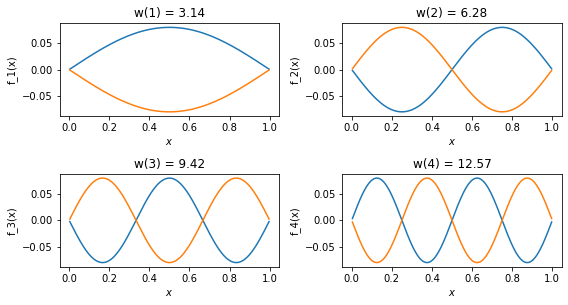

In [5]:
import numpy as np
import matplotlib.pyplot as plt

c = L = 1
N = 310
x = np.linspace(0, L, N+2)[1:-1]    
dx = x[1] - x[0]
matriz = (np.eye(N, k=-1) - 2*np.eye(N) + np.eye(N, k=1))
autovalor, fx = np.linalg.eigh((-matriz * c**2) / dx**2)
w = np.sqrt(autovalor)  # w^2 = -(matriz c^2) / dx^2 

#grafico
plt.figure(figsize=(8,6))
spt = 320
for i in range(4):
    spt += 1
    plt.subplot(spt)
    plt.title('w('+str(i+1) +') = ' + str(round(w[i],2)))
    plt.plot(x, +fx[:,i])
    plt.plot(x, -fx[:,i])
    plt.xlabel(R'$x$')
    plt.ylabel('f_'+ str(i+1) +'(x)')

plt.tight_layout()
plt.show()